In [1]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# Introduction & Problem Definition

Credit card fraud is a growing issue in the financial sector, costing billions in losses each year. This project aims to develop a machine learning classification model to predict fraudulent transactions.

## Key Questions
- Can we accurately classify transactions as fraudulent (Class = 1) or legitimate (Class = 0)?
- Which features (e.g., transaction amount, PCA-transformed components) are most predictive of fraud?
- How does the imbalance in the data effect the model's performance, and what techniques can mitigate this issue?

The goal for this project is to try and solve a binary classification problem and extract actionable insights from the data.

# Data Overview

The data set is sourced from Kaggle ([Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)). It contains transactions made by credit cards in September 2013 by European cardholders. The data set contains 31 columns and 284,807 rows. The features include:

- Time: Seconds elapsed between each transaction and the first transaction in the dataset.
- V1 to V28: Anonymized features obtained via PCA transformation, they capture the essential patterns in the data.
- Amount: The transaction amount.
- Class: The target variable where 0 represents a legitimate transaction and 1 indicates fraud.

In [2]:
import pandas as pd

data = pd.read_csv('creditcard.csv')
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Pre-Processing the Data

Pre-processing steps ensure that our data is clean and suitable for modeling. I will:

- Inspect Data Quality: Check for missing or anomalous values.
- Feature Scaling: Standardize the 'Amount' and 'Time' features for consistency.
- Address Class Imbalance: Use techniques like oversampling and undersampling to balance the classes.

In [3]:
# First I am splitting the data
from sklearn.model_selection import train_test_split
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
# I will be using SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution: ")
print(y.value_counts())
print("\nResampled class distribution: ")
print(y_resampled.value_counts())

Original class distribution: 
Class
0    284315
1       492
Name: count, dtype: int64

Resampled class distribution: 
Class
0    199020
1    199020
Name: count, dtype: int64


In [5]:
# Here I am checking for missing values and data types
print(data.info())
print(data.isnull().sum())

# Standardizing the 'Amount' and 'Time' features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Time','Amount']] = scaler.fit_transform(data[['Time','Amount']])

# Displaying the summary statistics to verify the scaling
data[['Time', 'Amount']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,Amount
count,2.848070e+05,2.848070e+05
mean,-3.065637e-16,2.913952e-17
std,1.000002e+00,1.000002e+00
min,-1.996583e+00,-3.532294e-01
25%,-8.552120e-01,-3.308401e-01
50%,-2.131453e-01,-2.652715e-01
75%,9.372174e-01,-4.471707e-02
max,1.642058e+00,1.023622e+02


## Visualize Class Distribution: Before and After Balancing

Seeing such an imbalanced bar chart is expected. The dataset has around 284,315 legitimate transactions (Class = 0) and 492 fraudulent transactions (Class=1). This shows us the distribution of the original class distribution, but in order to train the classification model effectively, I will need to use SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset. Below you can see before and after oversampling the minority class.

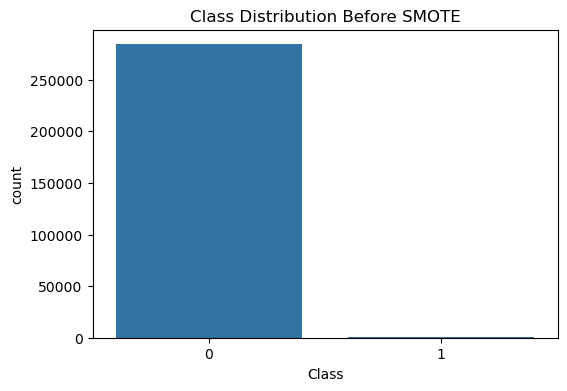

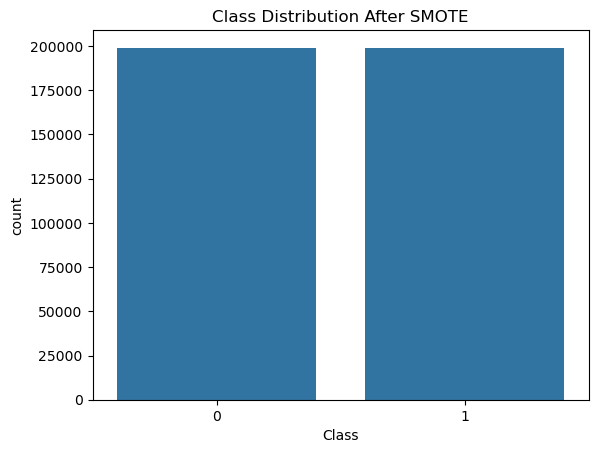

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution Before SMOTE")
plt.show()

sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

# Understanding the Data With Visualizations

Exploratory Data Analysis (EDA)

Explore the dataset to understand the distribution of features and relationships. This includes:

- Plotting histograms and boxplots to understand feature distributions.
- Creating a correlation heatmap for PCA components.
- Visualizing class imbalance and distributions of 'Amount' and 'Time'.

These visualizations help identify key trends that will inform my modeling strategy.

## Plotting 'Amount'

First I have plotted the distribution of the 'Amount' feature using a histogram. Keep in mind that transaction amounts in credit card datasets are often heavily skewed (many small amounts, fewer large amounts). By visualizing the distribution, I can see how the data is spread out and whether there are extreme outliers, thus guiding my pre-processing decisions. 

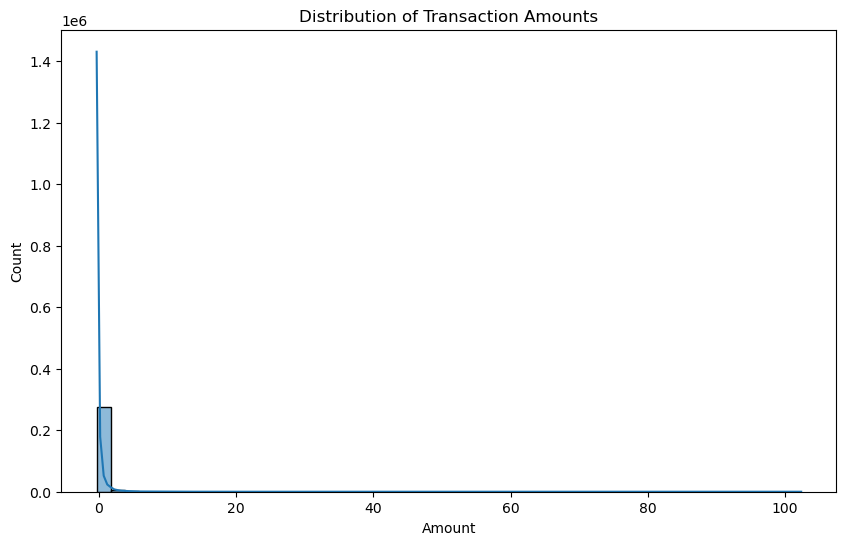

In [7]:
# Plotting the distribution of the 'Amount' feature.

plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

You might be thinking that something went wrong here but this is completely normal for financial transaction data. As I mentioned before, credit card data is known to be extremely skewed, with most transactions having relatively small amounts. As a result, by plotting a histogram on the near-original scale, I get a tall spike near zero and a long tail extending to higher values. In order to visualize the distribution in a more spread-out manner, I have applied a log transform. This way, the large range of values is compressed and you can see the shape of the distribution more clearly.

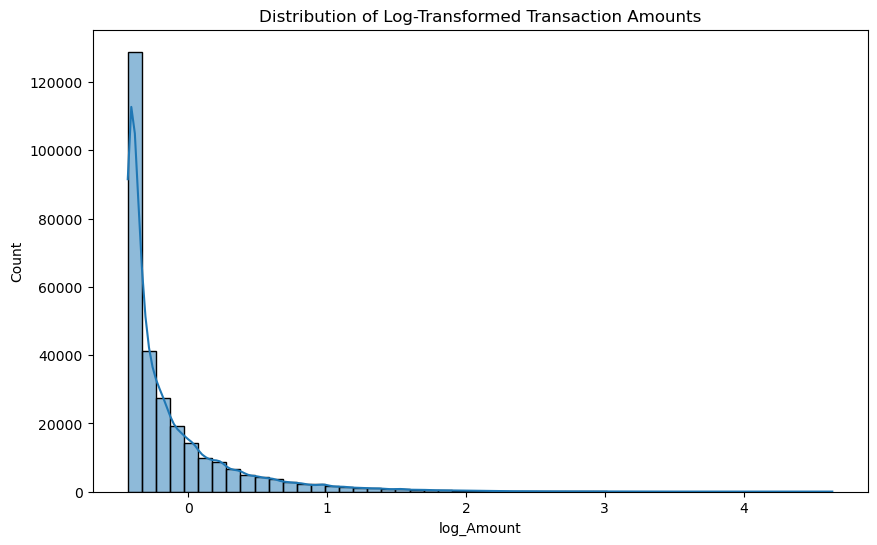

In [8]:
data['log_Amount'] = np.log1p(data['Amount'])

plt.figure(figsize=(10, 6))
sns.histplot(data['log_Amount'], bins=50, kde=True)
plt.title("Distribution of Log-Transformed Transaction Amounts")
plt.show()

## Plotting 'Time'

Next I used a boxplot to plot the 'Time' distribution. A boxplot shows the median, interquartile range, and overall spread of the data. For the 'Time' feature, this helps us to see how transactions are distributed throughout the time window captured by the dataset. If there are extreme values in this feature, the boxplot makes them easy to spot. Although 'Time' may not be as directly interpretable as a financial metric, examining it via a boxplot is still a valuable step in understanding the dataset's characteristics.

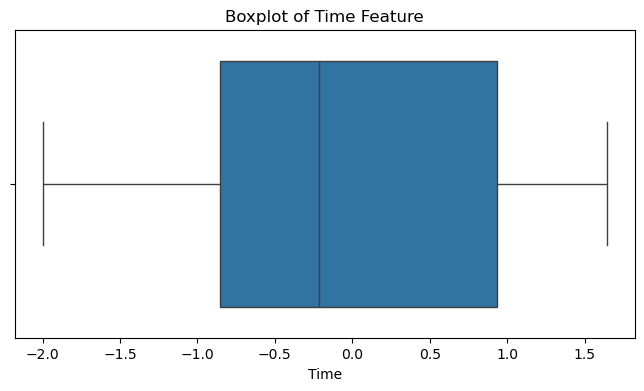

In [9]:
# Boxplot for the 'Time' feature.
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Time'])
plt.title("Boxplot of Time Feature")
plt.show()

Here we can see a fairly symmetric distribution with no extreme outliers. Given that I scaled the 'Time' feature for consistency, a boxplot with no apparent outliers and a relatively balanced box/whiskers simply indicates that the distribution does not have extreme deviations.

## Correlation Heatmap for PCA Features

Althought Principal Component Analysis, or PCA, is designed to produce uncorrelated components, it's still valuable to verify this assumption visually. A correlation heatmap allows us to confirm orthogonality, check for anomolies, and reassure model assumptions. 

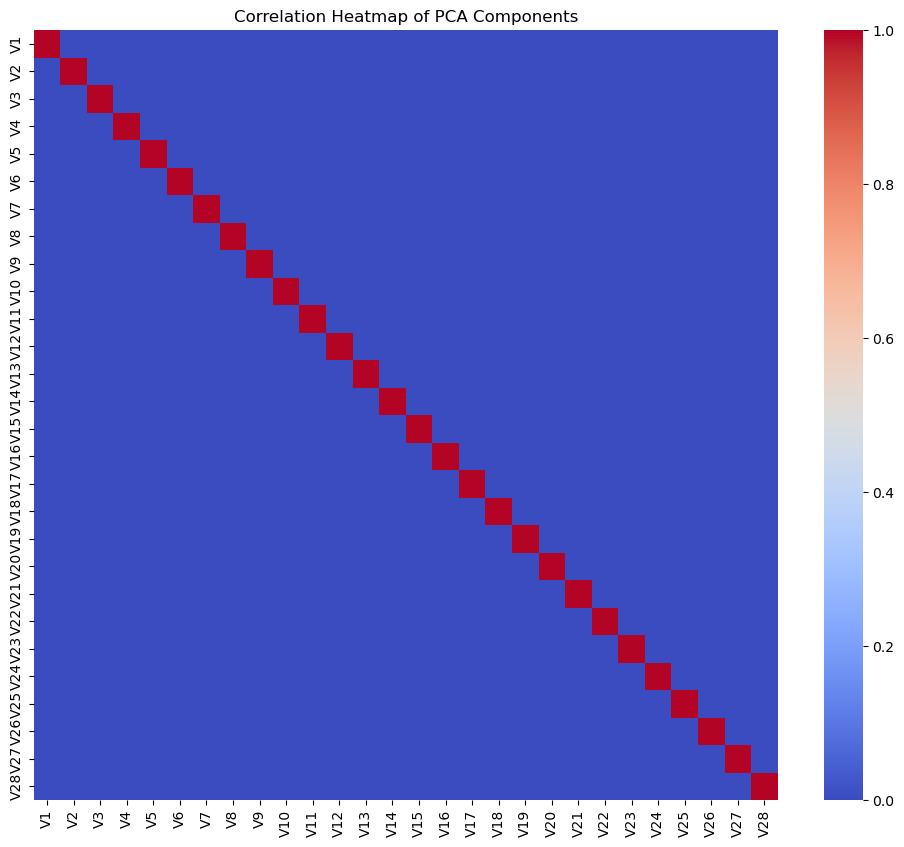

In [10]:
plt.figure(figsize=(12, 10))
pca_features = [col for col in data.columns if col.startswith('V')]
sns.heatmap(data[pca_features].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of PCA Components")
plt.show()

As you can see, there is a strong red along the diagonal and dark blue elsewhere. This means that the components are effectively uncorrelated with one another, exactly what we want to see.

# Building the Model

I will experiment with several classification algorithms:
- Logistic Regression: Simple and interpretable, serving as a baseline.
- Random Forest: Capture non-linear relationships and interactions.
- Gradient Boosting: This may offer higher accuracy on imbalanced data.

We want to compare with other models because we are working with imbalanced data.

I will use a confusion matrix to visualize the classification results, as it directly shows how many predictions were correct or incorrect for each class.

We want to improve recall without sacrificing too much precision, this is critical for applications like fraud detection, where missing a fraud case could be costly.


Choosing the right threshold at the intersecion of precision and recall

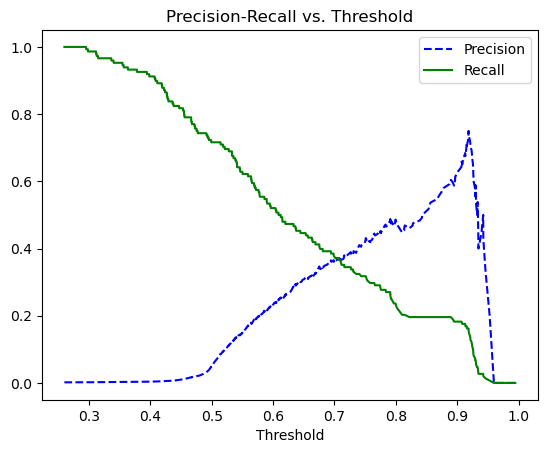

In [11]:
# Plotting the Precision-Recall curve to find the right threshold
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression



lr_model = LogisticRegression(solver='saga', max_iter=1000, tol=1e-3,random_state=42)
lr_model.fit(X_resampled, y_resampled)
y_scores = lr_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.title("Precision-Recall vs. Threshold")
plt.xlabel("Threshold")
plt.legend()
plt.show()

In [12]:
# Training the Logistic Regression model

threshold = 0.7


y_pred_adjusted = (y_scores >= threshold).astype(int)

# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
print("ROC-AUC Score: ", roc_auc_score(y_test, y_scores))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.36      0.37      0.36       148

    accuracy                           1.00     85443
   macro avg       0.68      0.69      0.68     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score:  0.9067599254099049


## Confusion Matrix?
A confusion matrix is a tabular way of visualizing the performance of a classification model by comparing the true labels with the model’s predicted labels. For a binary classification problem, the confusion matrix has four main cells:

- True Negatives (Top-Left): The model correctly predicts the negative (non-fraud, for example) class.
- False Positives (Top-Right): The model incorrectly predicts the positive (fraud) class when it’s actually negative.
- False Negatives (Bottom-Left): The model incorrectly predicts the negative class when it’s actually positive.
- True Positives (Bottom-Right): The model correctly predicts the positive class.

From these values, we can calculate key metrics such as precision, recall, F1-score, and accuracy, which give deeper insight into the chosen model’s strengths and weaknesses.
- Precision (Positive Predictive Value): Measures how many of the predicted positive cases are actually positive.
- Recall (Sensitivy or True Positivie Rate): Measures how many of the actual positive cases the model correctly identified.
- F1-Score: Measures the overall proportion of the correctly classified instances (both positives and negatives)

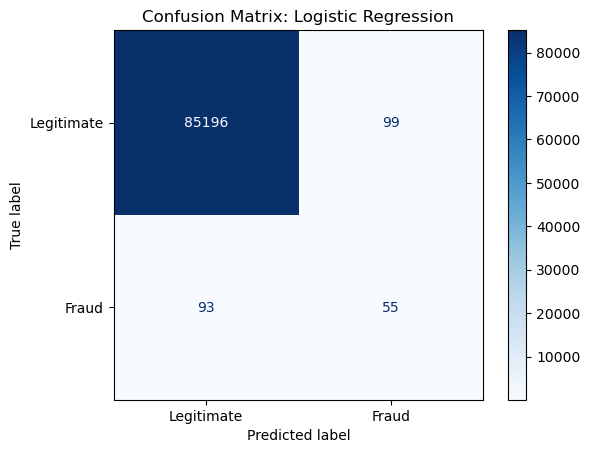

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legitimate', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

## Logistic Regression: Interpreting the Results

- Precision (Fraud) = TP / (TP + FP) = 55 / (55 + 99) ≈ 0.36

- Recall (Fraud) = TP / (TP + FN) = 55 / (55 + 93) ≈ 0.37

- Accuracy = (TN + TP) / (Total) = (85196 + 55) / 85443 ≈ 0.997

High Accuracy, Low Recall

- The model is great at identifying legitimate transactions (hence high accuracy), but it misses many fraud cases (63%).

Low Precision

- When the model does flag transactions as fraud, it’s only correct 36% of the time. This leads to some “false alarms.”

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score: ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score:  0.9493126795240049


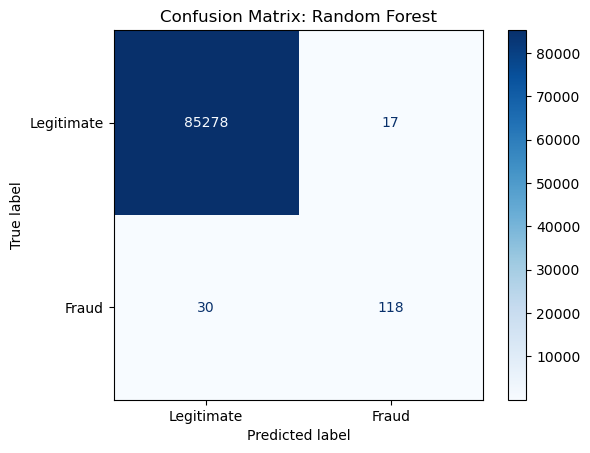

In [15]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Legitimate', 'Fraud'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest")
plt.show()

## Random Forest: Interpreting the Results


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.81      0.83       148

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.977539556673738


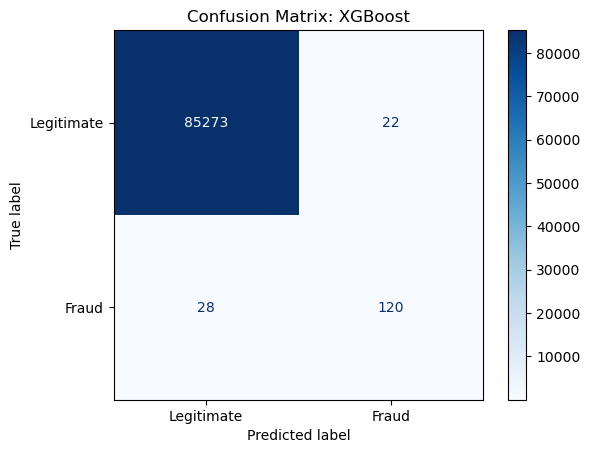

In [16]:
#%pip install xgboost
import xgboost as xgb

negative_count = sum(y_train == 0)
positive_count = sum(y_train == 1)
ratio = negative_count / positive_count
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=1)

xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Legitimate', 'Fraud'])
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: XGBoost")
plt.show()


## XGBoost: Interpreting Results

# Storytelling: What have we learned?
Summarize the entire process—from data exploration to model evaluation:

- What did your visualizations reveal about the data structure and potential fraud patterns?
- How did each model perform, and what trade-offs did you observe?
- Were the initial questions answered? For example, were you able to identify significant features that predict fraud?

"In exploring the data, I discovered that while most transactions are legitimate, certain subtle patterns in the PCA-transformed features strongly indicate fraudulent behavior. The logistic regression model provided a baseline, but more complex models like Random Forests and XGBoost captured the intricacies of the data more effectively. These insights could help financial institutions design more robust fraud detection systems."

# Impact Section

# References